<a href="https://colab.research.google.com/github/ramadhanridho16/Pandas_User_Guide/blob/main/Pandas_Quick_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

# Object Creation

In [4]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.827634,0.443497,0.545870,1.775014
2013-01-02,3.263426,-1.301234,-1.308912,-1.262883
2013-01-03,1.857723,1.025492,-0.522495,0.469029
2013-01-04,0.579002,-1.318919,0.324244,0.032756
2013-01-05,0.307363,0.562958,0.087100,-0.467276
2013-01-06,0.659372,-0.247187,0.976803,-0.432184


In [8]:
# Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:

df2 = pd.DataFrame(
    {
      "A": 1.0,
      "B": pd.Timestamp("20130102"),
      "C": pd.Series(1, index=list(range(4)), dtype="float32"),
      "D": np.array([3]*4, dtype="int32"),
      "E": pd.Categorical(["test", "train", "test", "train"]),
      "F": "foo"
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
# The columns of the resulting DataFrame have different dtypes:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

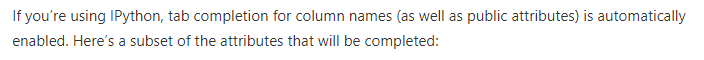

# Viewing Data

In [11]:
# How to view the top rows of the frame

df.head()

,A,B,C,D
2013-01-01,0.827634,0.443497,0.545870,1.775014
2013-01-02,3.263426,-1.301234,-1.308912,-1.262883
2013-01-03,1.857723,1.025492,-0.522495,0.469029
2013-01-04,0.579002,-1.318919,0.324244,0.032756
2013-01-05,0.307363,0.562958,0.087100,-0.467276


In [13]:
# Hot to view bottom rows of the frame

df.tail(3)

,A,B,C,D
2013-01-04,0.579002,-1.318919,0.324244,0.032756
2013-01-05,0.307363,0.562958,0.087100,-0.467276
2013-01-06,0.659372,-0.247187,0.976803,-0.432184


In [15]:
# Display the index:

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
# Display the columns :

df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

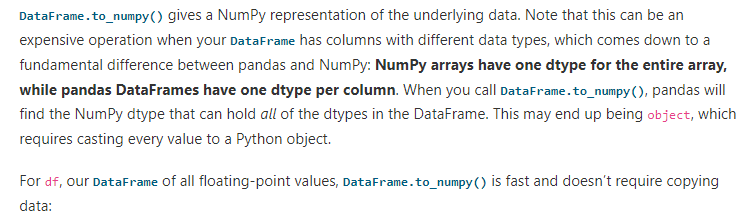

In [21]:
# DFor df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data:

df.to_numpy()

array([[ 0.82763419,  0.4434972 ,  0.54586982,  1.77501406],
       [ 3.26342631, -1.30123446, -1.30891242, -1.26288305],
       [ 1.85772341,  1.0254923 , -0.52249535,  0.46902925],
       [ 0.57900204, -1.3189189 ,  0.32424353,  0.03275639],
       [ 0.30736329,  0.56295764,  0.0871    , -0.46727586],
       [ 0.65937195, -0.24718675,  0.97680285, -0.4321843 ]])

In [20]:
# For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive:

df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

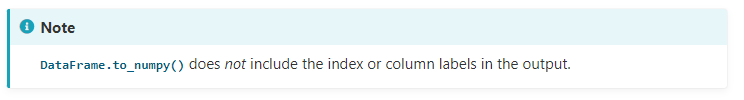

In [22]:
# describe() shows a quick statistic summary of your data:

df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,1.249087,-0.139232,0.017101,0.019076
std,1.121539,0.994263,0.818454,1.036297
min,0.307363,-1.318919,-1.308912,-1.262883
25%,0.599095,-1.037723,-0.370097,-0.458503
50%,0.743503,0.098155,0.205672,-0.199714
75%,1.600201,0.533093,0.490463,0.359961
max,3.263426,1.025492,0.976803,1.775014


In [23]:
# Transposing your data:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.827634,3.263426,1.857723,0.579002,0.307363,0.659372
B,0.443497,-1.301234,1.025492,-1.318919,0.562958,-0.247187
C,0.545870,-1.308912,-0.522495,0.324244,0.087100,0.976803
D,1.775014,-1.262883,0.469029,0.032756,-0.467276,-0.432184


In [24]:
# Sorting by an axis:

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.775014,0.545870,0.443497,0.827634
2013-01-02,-1.262883,-1.308912,-1.301234,3.263426
2013-01-03,0.469029,-0.522495,1.025492,1.857723
2013-01-04,0.032756,0.324244,-1.318919,0.579002
2013-01-05,-0.467276,0.087100,0.562958,0.307363
2013-01-06,-0.432184,0.976803,-0.247187,0.659372


In [26]:
# Sorting by values:
df.sort_values(by="B", ascending=False)

,A,B,C,D
2013-01-03,1.857723,1.025492,-0.522495,0.469029
2013-01-05,0.307363,0.562958,0.087100,-0.467276
2013-01-01,0.827634,0.443497,0.545870,1.775014
2013-01-06,0.659372,-0.247187,0.976803,-0.432184
2013-01-02,3.263426,-1.301234,-1.308912,-1.262883
2013-01-04,0.579002,-1.318919,0.324244,0.032756


# Selection

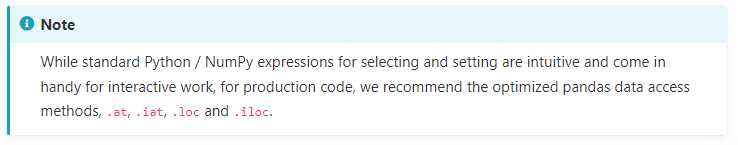

## Getting

In [27]:
# Selecting a single column, which give result a "Series", equivalent to df.A:
df["A"]

2013-01-01    0.827634
2013-01-02    3.263426
2013-01-03    1.857723
2013-01-04    0.579002
2013-01-05    0.307363
2013-01-06    0.659372
Freq: D, Name: A, dtype: float64

In [28]:
# selecting via [], which slice the rows:

df[0:3]

,A,B,C,D
2013-01-01,0.827634,0.443497,0.545870,1.775014
2013-01-02,3.263426,-1.301234,-1.308912,-1.262883
2013-01-03,1.857723,1.025492,-0.522495,0.469029
